### 복습

In [1]:
from konlpy.tag import Okt

In [4]:
text = '한글 자연어 처리를 재밌다 ㅎㅎ 이제부터 열심히 해야지'
okt = Okt()

In [8]:
print(okt.nouns(text))
print(okt.morphs(text))
print(okt.phrases(text))
print(okt.pos(text))


['한글', '자연어', '처리', '이제']
['한글', '자연어', '처리', '를', '재밌다', 'ㅎㅎ', '이제', '부터', '열심히', '해야지']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('를', 'Josa'), ('재밌다', 'Adjective'), ('ㅎㅎ', 'KoreanParticle'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb')]


In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [11]:
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."

In [12]:
print(sentence)

Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.


In [14]:
print(word_tokenize(sentence))
print(sent_tokenize(sentence))

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [16]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

In [22]:
count_vetorizer = CountVectorizer()
print(count_vetorizer.fit_transform(text_data).toarray())
print(count_vetorizer.vocabulary_)

[[1 0 1 0 0 0 1 0 0 0]
 [0 0 0 1 0 1 0 1 0 0]
 [0 1 0 1 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 1 0 1]]
{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [25]:
tfidf_vectorizer = TfidfVectorizer()
print(tfidf_vectorizer.fit_transform(text_data).toarray())
print(tfidf_vectorizer.vocabulary_)

[[0.57735027 0.         0.57735027 0.         0.         0.
  0.57735027 0.         0.         0.        ]
 [0.         0.         0.         0.52640543 0.         0.66767854
  0.         0.52640543 0.         0.        ]
 [0.         0.52640543 0.         0.52640543 0.         0.
  0.         0.         0.66767854 0.        ]
 [0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]
{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [27]:
import numpy as np
samples = ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아']

targets = np.array([[1], [0], [1], [1], [0], [1]])

In [28]:
import tensorflow as tf

In [29]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [35]:
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
input_sequence = np.array(sequences)
print(tokenizer.word_index)
print(input_sequence)

{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}
[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [40]:
class mymodel_nlp(tf.keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs):
        super(mymodel_nlp, self).__init__(name = 'subclass_nlp')
        self.embed = tf.keras.layers.Embedding(vocab_size, emb_size, name = 'embdding') #activation 없음
        self.hidden = tf.keras.layers.Dense(hidden, 'relu', name = 'hidden')
        self.outputs = tf.keras.layers.Dense(outputs, 'sigmoid', name = 'outputs')
    def call(self, inputs):
        x = self.embed(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.hidden(x)
        x = self.outputs(x)

        return x

mymodel = mymodel_nlp(21, 128, 64, 1)

In [41]:
mymodel.build(input_shape=(1, 4))
mymodel.summary()

Model: "subclass_nlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embdding (Embedding)        multiple                  2688      
                                                                 
 hidden (Dense)              multiple                  8256      
                                                                 
 outputs (Dense)             multiple                  65        
                                                                 
Total params: 11,009
Trainable params: 11,009
Non-trainable params: 0
_________________________________________________________________


In [45]:
mymodel.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
mymodel.fit(input_sequence, targets, epochs = 100, batch_size = 3)

Epoch 1/100
2/2 [==============================] - 2s 6ms/step - loss: 0.6922 - acc: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 0.6812 - acc: 0.8333
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6716 - acc: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6616 - acc: 1.0000
Epoch 5/100


2023-03-14 09:51:31.868887: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


2/2 [==============================] - 0s 8ms/step - loss: 0.6519 - acc: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6412 - acc: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6306 - acc: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6189 - acc: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6067 - acc: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5933 - acc: 1.0000
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 0.5793 - acc: 1.0000
Epoch 12/100
2/2 [==============================] - 0s 7ms/step - loss: 0.5643 - acc: 1.0000
Epoch 13/100
2/2 [==============================] - 0s 6ms/step - loss: 0.5479 - acc: 1.0000
Epoch 14/100
2/2 [==============================] - 0s 6ms/step - loss: 0.5307 - acc: 1.0000
Epoch 15/100
2/2 [==============================] - 0s 6ms/step - loss: 0.5119 - acc: 1

### 자연어 처리 개요

#### 단어 표현

In [47]:
A = np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
print(A)

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]


In [53]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U)
print()
print(s)
print()
print(VT)

[[-2.39751712e-01  7.51083898e-01  9.05932925e-17 -6.15135834e-01]
 [-5.06077194e-01  4.44029376e-01 -1.35889939e-16  7.39407727e-01]
 [-8.28495619e-01 -4.88580485e-01 -3.00875605e-17 -2.73649629e-01]
 [-7.19783140e-17 -2.24042335e-17  1.00000000e+00  1.47971801e-16]]

[2.68731789 2.04508425 1.73205081 0.77197992]

[[-9.05730252e-17 -3.08298331e-01 -3.08298331e-01 -2.77536539e-01
  -8.04917216e-01 -8.92159849e-02 -2.77536539e-01 -4.41881458e-17
  -4.41881458e-17]
 [ 3.38857308e-17 -2.38904821e-01 -2.38904821e-01  5.84383395e-01
  -2.60689306e-01  3.67263060e-01  5.84383395e-01 -3.42420311e-17
  -3.42420311e-17]
 [ 5.77350269e-01 -5.50814942e-17  5.81928632e-17  1.38606015e-16
  -1.41746067e-16  1.66877179e-16 -8.34385896e-17  5.77350269e-01
   5.77350269e-01]
 [ 2.32493354e-16 -3.54477649e-01 -3.54477649e-01  1.60978141e-01
   2.48851639e-01 -7.96828796e-01  1.60978141e-01 -5.08069894e-17
  -5.08069894e-17]
 [-9.71445147e-17 -7.79217669e-01 -1.33887309e-02 -1.98151600e-01
   3.96303200

In [59]:
lsa_matrix = np.hstack([U[:, 0:1]*s[0], U[:, 1:2]*s[1]])
print(lsa_matrix[:, 0])

[-6.44289063e-01 -1.35999029e+00 -2.22643109e+00 -1.93428611e-16]


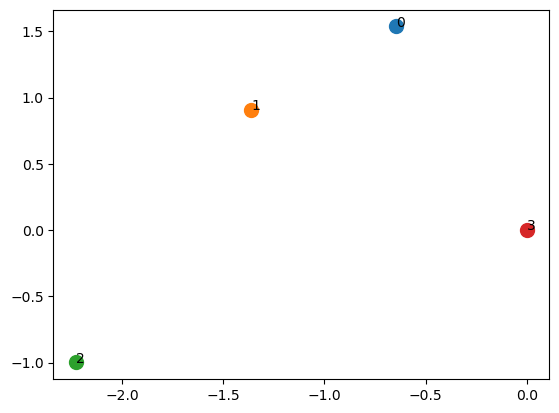

In [76]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.plot(lsa_matrix[i, 0], lsa_matrix[i, 1], 'o', markersize=10)
    plt.text(lsa_matrix[i, 0], lsa_matrix[i, 1], i)
plt.show()

#### 임베딩 사이즈 (word2vec)

In [ ]:
# CBOW: 주변 단어를 통해 하나의 단어를 예측

# Skip-Gram: 하나의 단어를 가지고 주변에 올 단어 예측 (이걸 사용함)
## 문장의 상관관계를 예측하는 최적화된 매트릭스
## 단어의 의미를 포함하고 있다.

#### 텍스트 유사도(챗봇에서 두 질문의 유사도를 판단하는 것)

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")
print(sent)

('휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.', '폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.')


In [3]:
count_vetorizer = CountVectorizer()
tdm = count_vetorizer.fit_transform(sent)
print(count_vetorizer.vocabulary_) # one hot vertor 만들때 사용
print(tdm.toarray())

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1]
 [1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1]]


In [4]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent)
print(tfidf_matrix.toarray())

idf = tfidf_vectorizer.idf_
print(idf)
print(tfidf_vectorizer.get_feature_names_out())

[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]
[1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.
 1.40546511 1.         1.40546511 1.40546511 1.        ]
['갑작스런' '내일' '놀러왔다가' '망연자실' '반가운' '서쪽' '소식' '오늘' '으로' '이어졌는데요' '인해' '있습니다'
 '중심' '폭염' '피해서' '하고' '휴일']


In [5]:
tfidf_matrix = tfidf_matrix.toarray()
print(tfidf_matrix)

[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]


#### 코사인 유사도

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
print('코사인 유사도 =', cosine_similarity([tfidf_matrix[0]], [tfidf_matrix[1]])) # 1에 가까울 수록 두 문장이 완벽히 일치한다.

코사인 유사도 = [[0.17952266]]


In [8]:
A = tfidf_matrix[0]
B = tfidf_matrix[1]

print(A)
print(B)

upper = np.sum(A*B)
norm_A = np.sqrt(np.sum(A**2))
norm_B = np.sqrt(np.sum(B**2))
print(upper)

cosine_sim = upper/(norm_A * norm_B)

print(cosine_sim)

[0.         0.32412345 0.         0.         0.32412345 0.32412345
 0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
 0.32412345 0.2306165  0.         0.         0.2306165 ]
[0.36469323 0.         0.36469323 0.36469323 0.         0.
 0.         0.         0.         0.         0.36469323 0.25948224
 0.         0.25948224 0.36469323 0.36469323 0.25948224]
0.17952265829918895
0.17952265829918898


#### 유클리디언 유사도

In [9]:
from sklearn.metrics.pairwise import euclidean_distances

In [10]:
print(euclidean_distances([tfidf_matrix[0]], [tfidf_matrix[1]]))
print(np.sqrt(np.sum((A - B) ** 2)))

[[1.28099753]]
1.280997534502554


#### 데이터 이해하기(EDA)

In [13]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [15]:
data_set = tf.keras.utils.get_file(fname = 'imdb.tar.gz', origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", extract=True)

84125825/84125825 [==============================] - 8s 0us/step


In [39]:
train_pos_path = '/home/jasper/.keras/datasets/aclImdb/train/pos/'
train_neg_path = '/home/jasper/.keras/datasets/aclImdb/train/neg/'
print(train_pos_path)

/home/jasper/.keras/datasets/aclImdb/train/pos/


In [42]:
data = {}
data['review'] = []

for file_path in os.listdir(train_pos_path):
    with open(train_pos_path + file_path, 'r', encoding = 'utf-8') as f:
        data['review'].append(f.read())

data_train_pos = pd.DataFrame.from_dict(data)
data_train_pos.head()

,review
0,I would say that this film gives an insight to...
1,This is my favorite of the older Tom & Jerry c...
2,I find it so amazing that even after all these...
3,Debut? Wow--Cross-Eyed is easily one of the mo...
4,I first saw this movie when it came out in 199...


In [41]:
data_neg = {}
data_neg['review'] = []

for file_path in os.listdir(train_neg_path):
    with open(train_neg_path + file_path, 'r', encoding = 'utf-8') as f:
        data_neg['review'].append(f.read())

In [43]:
data_train_neg = pd.DataFrame.from_dict(data_neg)
data_train_neg.head()

,review
0,I loathed this film. The original Phantasm had...
1,"but ""Cinderella"" gets my vote, not only for th..."
2,I consider this film one of the worst in the N...
3,This movie still chills me to the bone thinkin...
4,"As an Army veteran, I was deeply offended by t..."


In [44]:
print(data_train_pos.shape, data_train_neg.shape)

(12500, 1) (12500, 1)


In [45]:
data_train_neg['sentiment'] = 0
data_train_pos['sentiment'] = 1

In [49]:
print(data_train_neg.head())
print(data_train_pos.head())
print(data_train_pos.shape, data_train_neg.shape)

                                              review  sentiment
0  I loathed this film. The original Phantasm had...          0
1  but "Cinderella" gets my vote, not only for th...          0
2  I consider this film one of the worst in the N...          0
3  This movie still chills me to the bone thinkin...          0
4  As an Army veteran, I was deeply offended by t...          0
                                              review  sentiment
0  I would say that this film gives an insight to...          1
1  This is my favorite of the older Tom & Jerry c...          1
2  I find it so amazing that even after all these...          1
3  Debut? Wow--Cross-Eyed is easily one of the mo...          1
4  I first saw this movie when it came out in 199...          1
(12500, 2) (12500, 2)


In [54]:
train_df = pd.concat([data_train_pos, data_train_neg], axis = 0)
print(train_df.head())
print(train_df.tail())
print(train_df.shape)


                                              review  sentiment
0  I would say that this film gives an insight to...          1
1  This is my favorite of the older Tom & Jerry c...          1
2  I find it so amazing that even after all these...          1
3  Debut? Wow--Cross-Eyed is easily one of the mo...          1
4  I first saw this movie when it came out in 199...          1
                                                  review  sentiment
12495  You know Jason, you know Freddy, and you know ...          0
12496  When I saw the preview, I thought: this is goi...          0
12497  Have I ever seen a film more shockingly inept?...          0
12498  I figured that it's about time I let this one ...          0
12499  The title creatures wreak havoc at a peaceful ...          0
(25000, 2)


In [55]:
##
review = train_df['review']
review.head()

0    I would say that this film gives an insight to...
1    This is my favorite of the older Tom & Jerry c...
2    I find it so amazing that even after all these...
3    Debut? Wow--Cross-Eyed is easily one of the mo...
4    I first saw this movie when it came out in 199...
Name: review, dtype: object

In [63]:
tokenized_review = [r.split() for r in review] # 리뷰 1줄을 단어 하나씩 split

In [64]:
print(len(tokenized_review))
print(tokenized_review[0])
print(len(tokenized_review[0]))

25000
['I', 'would', 'say', 'that', 'this', 'film', 'gives', 'an', 'insight', 'to', 'the', 'trauma', 'that', 'a', 'young', 'mind', 'can', 'face', 'when', 'a', 'family', 'is', 'split', 'by', 'divorce', 'or', 'other', 'disaster.', 'I', 'would', 'highly', 'recommend', 'this', 'film', 'especially', 'to', 'parents', 'or', 'individuals', 'planning', 'to', 'have', 'a', 'family.<br', '/><br', '/>I', 'found', 'the', 'characters', 'to', 'be', 'appealing', 'and', 'highly', 'sympathetic', 'from', 'a', 'multitude', 'of', 'dimensions.<br', '/><br', '/>The', 'scary', 'monster', 'although', 'probably', 'not', 'scary', 'to', 'most', 'adults,', 'has', 'a', 'very', 'real', 'hint', 'of', 'what', 'the', 'overactive', 'imagination', 'of', 'a', 'child', 'who', 'is', 'facing', 'unknown', 'terrors', 'might', 'create.<br', '/><br', '/>I', 'found', 'the', 'film', 'to', 'be', 'delightful!']
99


In [66]:
tokenized_review_len = [len(t) for t in tokenized_review] # 각 토큰의 길이를 리턴
print(tokenized_review_len)

[99, 158, 436, 102, 314, 129, 221, 148, 110, 72, 25, 195, 159, 266, 516, 258, 663, 142, 613, 88, 469, 153, 140, 56, 162, 202, 74, 385, 131, 92, 125, 810, 126, 248, 149, 743, 77, 239, 211, 790, 261, 499, 86, 155, 147, 136, 207, 110, 147, 855, 168, 389, 454, 116, 220, 323, 370, 582, 108, 390, 119, 334, 72, 157, 313, 51, 176, 124, 714, 438, 250, 668, 293, 56, 120, 171, 467, 373, 190, 155, 306, 208, 156, 651, 126, 147, 283, 185, 202, 176, 235, 239, 124, 140, 475, 159, 118, 641, 178, 155, 125, 322, 213, 131, 170, 306, 325, 236, 105, 321, 131, 179, 291, 217, 203, 183, 133, 157, 375, 591, 169, 461, 196, 45, 119, 534, 156, 100, 205, 152, 160, 120, 81, 139, 300, 303, 285, 228, 720, 242, 234, 303, 54, 403, 131, 88, 179, 464, 124, 161, 176, 296, 168, 91, 158, 439, 107, 462, 170, 134, 120, 266, 144, 127, 98, 156, 125, 113, 419, 166, 87, 220, 83, 268, 220, 423, 119, 92, 364, 133, 140, 186, 109, 269, 117, 421, 144, 130, 138, 199, 126, 153, 156, 277, 203, 267, 52, 158, 153, 208, 66, 405, 67, 310, 126

In [68]:
alphabet_review_len = [len(a.replace(' ', '')) for a in review] # 공백을 없애서 알파벳 개수를 리턴
print(alphabet_review_len)

[473, 663, 2007, 512, 1339, 786, 1064, 684, 542, 394, 134, 851, 770, 1454, 2376, 1349, 3226, 634, 2967, 397, 2388, 839, 624, 264, 741, 963, 329, 1883, 587, 430, 519, 4048, 523, 1029, 625, 3685, 326, 1228, 922, 3549, 1152, 2203, 392, 656, 727, 525, 931, 540, 679, 4292, 697, 1902, 2209, 554, 1144, 1499, 1967, 2874, 457, 1886, 554, 1462, 294, 662, 1488, 254, 832, 516, 3380, 2230, 1233, 3291, 1250, 236, 589, 864, 2105, 1535, 863, 726, 1461, 868, 774, 2924, 561, 607, 1348, 824, 930, 849, 1060, 1166, 557, 563, 2135, 680, 583, 2990, 759, 715, 527, 1381, 947, 580, 767, 1416, 1434, 1058, 524, 1426, 624, 870, 1336, 980, 994, 793, 626, 738, 1853, 2696, 754, 2048, 909, 205, 504, 2678, 739, 542, 981, 633, 680, 573, 397, 609, 1347, 1255, 1503, 1037, 3684, 1021, 1116, 1478, 218, 1927, 570, 337, 855, 2228, 638, 732, 851, 1521, 724, 345, 814, 2143, 546, 2185, 850, 598, 544, 1251, 670, 573, 438, 715, 624, 511, 1993, 802, 375, 997, 331, 1438, 1105, 2077, 514, 372, 1708, 657, 651, 857, 496, 1254, 548, 200

In [69]:
import matplotlib.pyplot as plt

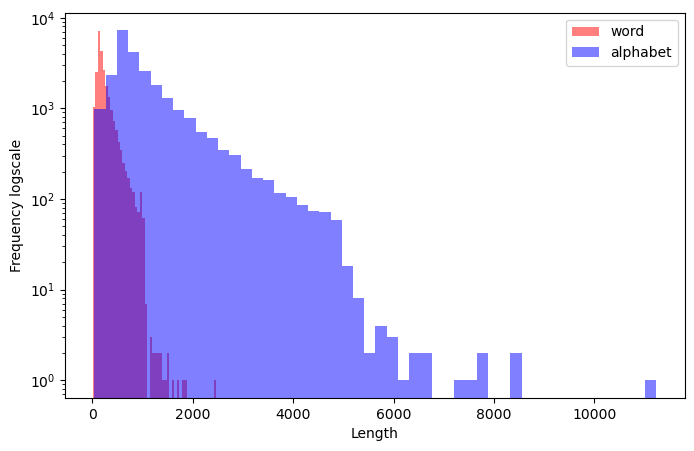

In [79]:
plt.figure(figsize=(8,5))
plt.hist(tokenized_review_len,bins=50, color='red', alpha =0.5, label='word')
plt.hist(alphabet_review_len,bins=50, color='blue', alpha =0.5, label='alphabet')
plt.yscale('log')
plt.xlabel('Length')
plt.ylabel('Frequency logscale')
plt.legend()
plt.show()

In [93]:
def word_represent(x):
    print('word의 최대 크기: {}'.format(np.max(x)))
    print('word의 최소 크기: {}'.format(np.min(x)))
    print('word의 평균 크기: {}'.format(np.mean(x)))
    print('word의 표준 편차: {}'.format(np.std(x)))
    print('word의 중간값: {}'.format(np.median(x)))
    print('word의 1사분위수: {}'.format(np.percentile(x, 25)))
    print('word의 3사분위수: {}'.format(np.percentile(x, 75)))

word_represent(tokenized_review_len)

word의 최대 크기: 2470
word의 최소 크기: 10
word의 평균 크기: 233.7872
word의 표준 편차: 173.72955740506563
word의 중간값: 174.0
word의 1사분위수: 127.0
word의 3사분위수: 284.0


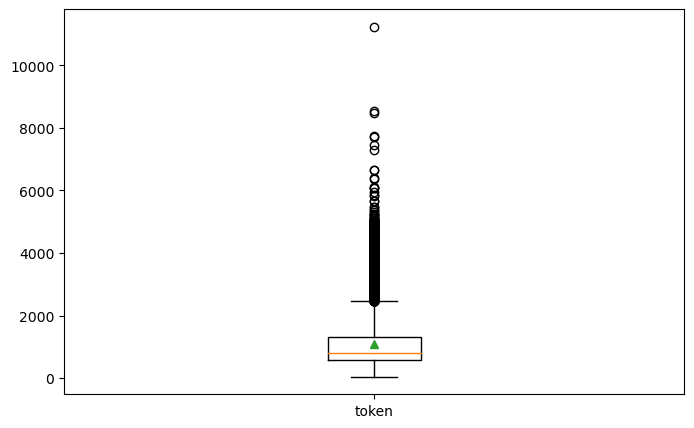

In [97]:
plt.figure(figsize=(8,5))
plt.boxplot([alphabet_review_len], labels = ['token'], showmeans=True)
plt.show()

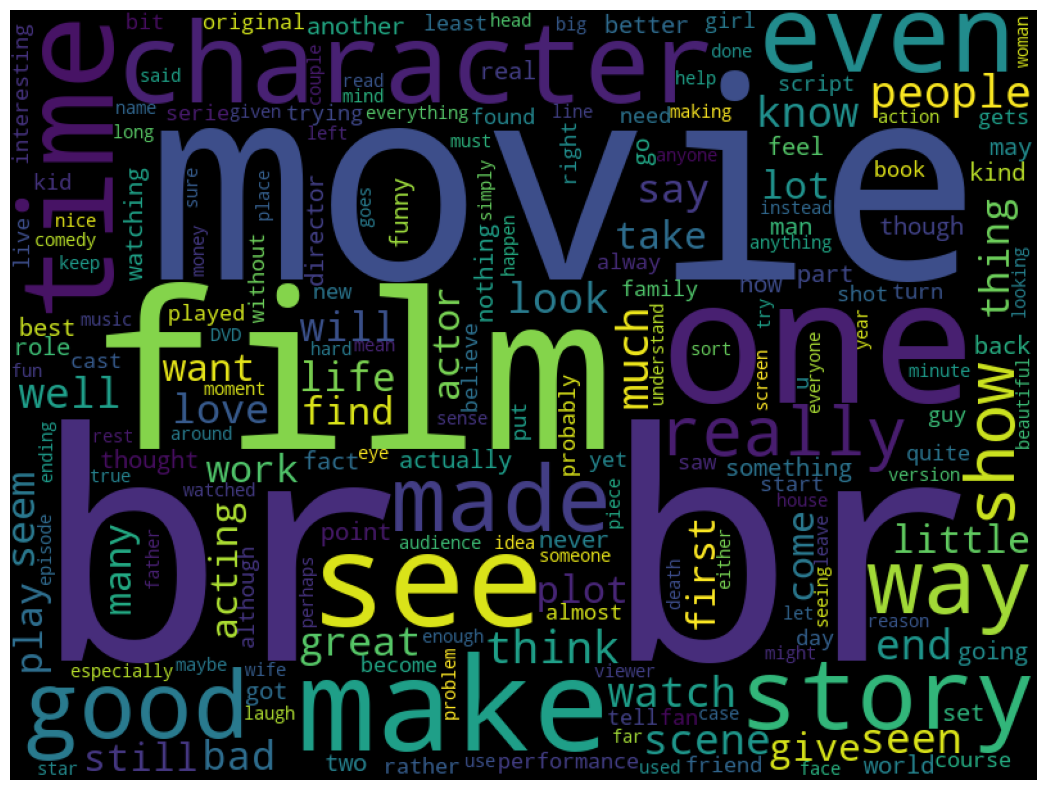

In [100]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()